In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [102]:
# Загружаем данные из pandas
data = pd.read_csv('../csv_file/train.csv')
data.head()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_18932\4057573501.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450

report_date  client_id  target  col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  col11  col12  col13  col14  col15  col16  col17  col18  col19  col20  col21  col22  col23  col24  col25  col26  col27  col28  col29  col30  col31  col32  col33  col34  col35  col36  col37  col38  col39  col40  col41  col42  col43  col44  col45  col46  col47  col48 col49 col50 col51 col52 col53 col54 col55 col56 col57 col58 col59 col60 col61 col62 col63 col64  col65  col66  col67  col68  col69  col70  col71  col72  col73  col74  col75  col76  col77  col78  col79  col80  col81  col82  col83  col84 col85 col86 col87 col88 col89 col90 col91 col92 col93 col94 col95 col96 col97 col98 col99 col100  col101  col102  col103  col104  col105  col106  col107  col108  col109  col110  col111  col112  col113  col114  col115  col116  col117  col118  col119  col120  col121  col122  col123  col124  col125  col126  col127  col128 col129 col130 col131 col132 col133 col134 col135 col136 col137 col138 col139  \
0  2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2  2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  2022-09-01 

In [103]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.heatmap(data.isna(), cmap="viridis", cbar=False)
# plt.title("Визуализация пропусков")
# plt.show()


In [104]:
print("Размер данных до удаления:", data.shape)
data = data.dropna(axis=1, how='all')
print("Размер данных после удаления:", data.shape)


Размер данных до удаления: (14456, 2666)
Размер данных после удаления: (14456, 2585)


In [105]:
missing_percentage = data.isnull().mean() * 100

print("Процент пропусков в каждой колонке:")
print(missing_percentage)

Процент пропусков в каждой колонке:
report_date     0.000000
client_id       0.000000
target          0.000000
col1           99.979247
col2           99.958495
col3           99.916989
col4           99.868567
col5           99.993082
col6           99.993082
col7           99.979247
col8           99.944660
col9           99.993082
col10          99.993082
col11          99.979247
col12          99.944660
col13          99.993082
col14          99.993082
col15          99.979247
col16          99.944660
col17          99.993082
col18          99.993082
col19          99.979247
col20          99.944660
col21          99.993082
col22          99.993082
col23          99.979247
col24          99.944660
col25          99.993082
col26          99.993082
col27          99.979247
col28          99.944660
col29          99.993082
col30          99.993082
col31          99.979247
col32          99.944660
col33          99.993082
col34          99.993082
col35          99.979247
col36         

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2585 entries, report_date to col2663
dtypes: float64(2235), int64(3), object(347)
memory usage: 285.1+ MB


In [107]:
data.dtypes

report_date     object
client_id        int64
target           int64
col1           float64
col2           float64
col3           float64
col4           float64
col5           float64
col6           float64
col7           float64
col8           float64
col9           float64
col10          float64
col11          float64
col12          float64
col13          float64
col14          float64
col15          float64
col16          float64
col17          float64
col18          float64
col19          float64
col20          float64
col21          float64
col22          float64
col23          float64
col24          float64
col25          float64
col26          float64
col27          float64
col28          float64
col29          float64
col30          float64
col31          float64
col32          float64
col33          float64
col34          float64
col35          float64
col36          float64
col37          float64
col38          float64
col39          float64
col40          float64
col41      

In [108]:
trash = 0.92

# удаляем столбцы с более 92% пропущенными значениями
dt_cl = data.loc[:, data.isnull().mean() <= trash]

<Axes: >

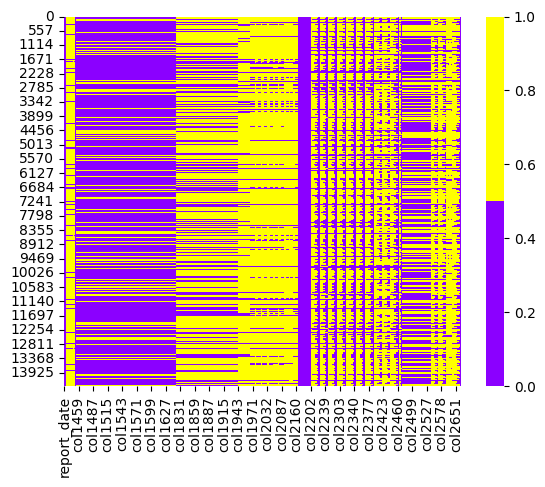

In [109]:
cols = dt_cl.columns
#фиолетовые - не пропущенные данные, желтые - пропущенные
colours = ['#8b00ff', '#ffff00']
sns.heatmap(dt_cl[cols].isnull(), cmap=sns.color_palette(colours))

In [110]:
dt_cl.head(10)

,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,col504,col508,col512,col520,col528,col536,col544,col552,col560,col592,col600,col608,col1453,col1454,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,col1463,col1464,col1465,col1466,col1467,col1468,col1469,col1470,col1471,col1472,col1473,col1474,col1475,col1476,col1477,col1478,col1479,col1480,col1481,col1482,col1483,col1484,col1485,col1486,col1487,col1488,col1489,col1490,col1491,col1492,col1493,col1494,col1495,col1496,col1497,col1498,col1499,col1500,col1501,col1502,col1503,col1504,col1505,col1506,col1507,col1508,col1509,col1510,col1511,col1512,col1513,col1514,col1515,col1516,col1517,col1518,col1519,col1520,col1521,col1522,col1523,col1524,col1525,col1526,col1527,col1528,col1529,col1530,col1531,col1532,col1533,col1534,col1535,col1536,col1537,col1538,col1539,col1540,col1541,col1542,col1543,col1544,col1545,col1546,col1547,col1548,col1549,col1550,col1551,col1552,col1553,col1554,col1555,col1556,col1557,col1558,col1559,col1560,col1561,col1562,col1563,col1564,col1565,col1566,col1567,col1568,col1569,col1570,col1571,col1572,col1573,col1574,col1575,col1576,col1577,col1578,col1579,col1580,col1581,col1582,col1583,col1584,col1585,col1586,col1587,col1588,col1589,col1590,col1591,col1592,col1593,col1594,col1595,col1596,col1597,col1598,col1599,col1600,col1601,col1602,col1603,col1604,col1605,col1606,col1607,col1608,col1609,col1610,col1611,col1612,col1613,col1614,col1615,col1616,col1617,col1618,col1619,col1620,col1621,col1622,col1623,col1624,col1625,col1626,col1627,col1628,col1629,col1630,col1631,col1632,col1633,col1634,col1635,col1636,col1637,col1638,col1639,col1640,col1641,col1642,col1643,col1644,col1645,col1646,col1823,col1824,col1825,col1826,col1827,col1828,col1829,col1830,col1831,col1832,col1833,col1834,col1835,col1836,col1837,col1838,col1839,col1840,col1841,col1842,col1843,col1844,col1845,col1846,col1847,col1848,col1849,col1850,col1851,col1852,col1853,col1854,col1855,col1856,col1857,col1858,col1859,col1860,col1861,col1862,col1863,col1864,col1865,col1866,col1867,col1868,col1869,col1870,col1871,col1872,col1873,col1874,col1875,col1876,col1877,col1878,col1879,col1880,col1881,col1882,col1883,col1884,col1885,col1886,col1887,col1888,col1889,col1890,col1891,col1892,col1893,col1894,col1895,col1896,col1897,col1898,col1899,col1900,col1901,col1902,col1903,col1904,col1905,col1906,col1907,col1908,col1909,col1910,col1911,col1912,col1913,col1914,col1915,col1916,col1917,col1918,col1919,col1920,col1921,col1922,col1923,col1924,col1925,col1926,col1927,col1928,col1929,col1930,col1931,col1932,col1933,col1934,col1935,col1936,col1937,col1938,col1939,col1940,col1941,col1942,col1943,col1944,col1945,col1946,col1947,col1948,col1949,col1950,col1951,col1952,col1953,col1954,col1955,col1956,col1957,col1958,col1959,col1960,col1961,col1962,col1963,col1964,col1965,col1966,col1967,col1968,col1969,col1970,col1971,col1972,col1973,col1974,col1984,col1985,col1986,col1987,col1988,col1989,col1990,col1991,col1992,col1996,col1997,col1998,col2008,col2009,col2010,col2011,col2012,col2013,col2014,col2015,col2016,col2020,col2021,col2022,col2032,col2033,col2034,col2035,col2036,col2037,col2038,col2039,col2040,col2044,col2045,col2046,col2059,col2060,col2061,col2062,col2063,col2064,col2068,col2069,col2070,col2080,col2081,col2082,col2083,col2084,col2085,col2086,col2087,col2088,col2092,col2093,col2094,col2107,col2108,col2109,col2110,col2111,col2112,col2116,col2117,col2118,col2131,col2132,col2133,col2134,col2135,col2136,col2140,col2141,col2142,col2155,col2156,col2157,col2158,col2159,col2160,col2164,col2165,col2166,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,col2175,col2176,col2177,col2178,col2179,col2180,col2181,col2182,col2183,col2184,col2185,col2186,col2187,col2188,col2189,col2190,col2202,col2203,col2204,col2205,col2206,col2207,col2208,col2209,col2210,col2211,col2212,col2213,col2214,col2215,col2216,col2220,col2221,col2222,col2229,col2230,col2231,col2232,col2233,col2234,col2235,col22

In [111]:
missing_percentage = dt_cl.isnull().mean() * 100
print(missing_percentage)

report_date     0.000000
client_id       0.000000
target          0.000000
col476         89.091035
col480         89.091035
col484         89.091035
col488         89.091035
col492         89.091035
col496         89.091035
col500         89.091035
col504         89.091035
col508         89.091035
col512         89.091035
col520         89.091035
col528         89.091035
col536         89.091035
col544         89.091035
col552         89.091035
col560         90.951854
col592         89.091035
col600         89.423077
col608         89.457665
col1453         0.000000
col1454         0.006918
col1455        23.083841
col1456        23.083841
col1457        23.083841
col1458        23.083841
col1459        23.083841
col1460        23.083841
col1461        23.083841
col1462        23.083841
col1463        23.083841
col1464        23.083841
col1465        23.083841
col1466        23.083841
col1467        23.083841
col1468        23.083841
col1469        23.083841
col1470        23.083841


In [112]:
# # Установить максимальное количество строк и столбцов для отображения
# pd.set_option('display.max_rows', None)  # Показывать все строки
# pd.set_option('display.max_columns', None)  # Показывать все столбцы

# # Для удобства ширину столбцов тоже можно увеличить
# pd.set_option('display.width', 1000)

In [113]:
dt_cl.drop_duplicates(inplace=True)

C:\Users\Vlad\AppData\Local\Temp\ipykernel_18932\531787891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_cl.drop_duplicates(inplace=True)


In [114]:
df_sorted = dt_cl.sort_values(by='col2663', ascending=False)
df_sorted.head()

,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,col504,col508,col512,col520,col528,col536,col544,col552,col560,col592,col600,col608,col1453,col1454,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,col1463,col1464,col1465,col1466,col1467,col1468,col1469,col1470,col1471,col1472,col1473,col1474,col1475,col1476,col1477,col1478,col1479,col1480,col1481,col1482,col1483,col1484,col1485,col1486,col1487,col1488,col1489,col1490,col1491,col1492,col1493,col1494,col1495,col1496,col1497,col1498,col1499,col1500,col1501,col1502,col1503,col1504,col1505,col1506,col1507,col1508,col1509,col1510,col1511,col1512,col1513,col1514,col1515,col1516,col1517,col1518,col1519,col1520,col1521,col1522,col1523,col1524,col1525,col1526,col1527,col1528,col1529,col1530,col1531,col1532,col1533,col1534,col1535,col1536,col1537,col1538,col1539,col1540,col1541,col1542,col1543,col1544,col1545,col1546,col1547,col1548,col1549,col1550,col1551,col1552,col1553,col1554,col1555,col1556,col1557,col1558,col1559,col1560,col1561,col1562,col1563,col1564,col1565,col1566,col1567,col1568,col1569,col1570,col1571,col1572,col1573,col1574,col1575,col1576,col1577,col1578,col1579,col1580,col1581,col1582,col1583,col1584,col1585,col1586,col1587,col1588,col1589,col1590,col1591,col1592,col1593,col1594,col1595,col1596,col1597,col1598,col1599,col1600,col1601,col1602,col1603,col1604,col1605,col1606,col1607,col1608,col1609,col1610,col1611,col1612,col1613,col1614,col1615,col1616,col1617,col1618,col1619,col1620,col1621,col1622,col1623,col1624,col1625,col1626,col1627,col1628,col1629,col1630,col1631,col1632,col1633,col1634,col1635,col1636,col1637,col1638,col1639,col1640,col1641,col1642,col1643,col1644,col1645,col1646,col1823,col1824,col1825,col1826,col1827,col1828,col1829,col1830,col1831,col1832,col1833,col1834,col1835,col1836,col1837,col1838,col1839,col1840,col1841,col1842,col1843,col1844,col1845,col1846,col1847,col1848,col1849,col1850,col1851,col1852,col1853,col1854,col1855,col1856,col1857,col1858,col1859,col1860,col1861,col1862,col1863,col1864,col1865,col1866,col1867,col1868,col1869,col1870,col1871,col1872,col1873,col1874,col1875,col1876,col1877,col1878,col1879,col1880,col1881,col1882,col1883,col1884,col1885,col1886,col1887,col1888,col1889,col1890,col1891,col1892,col1893,col1894,col1895,col1896,col1897,col1898,col1899,col1900,col1901,col1902,col1903,col1904,col1905,col1906,col1907,col1908,col1909,col1910,col1911,col1912,col1913,col1914,col1915,col1916,col1917,col1918,col1919,col1920,col1921,col1922,col1923,col1924,col1925,col1926,col1927,col1928,col1929,col1930,col1931,col1932,col1933,col1934,col1935,col1936,col1937,col1938,col1939,col1940,col1941,col1942,col1943,col1944,col1945,col1946,col1947,col1948,col1949,col1950,col1951,col1952,col1953,col1954,col1955,col1956,col1957,col1958,col1959,col1960,col1961,col1962,col1963,col1964,col1965,col1966,col1967,col1968,col1969,col1970,col1971,col1972,col1973,col1974,col1984,col1985,col1986,col1987,col1988,col1989,col1990,col1991,col1992,col1996,col1997,col1998,col2008,col2009,col2010,col2011,col2012,col2013,col2014,col2015,col2016,col2020,col2021,col2022,col2032,col2033,col2034,col2035,col2036,col2037,col2038,col2039,col2040,col2044,col2045,col2046,col2059,col2060,col2061,col2062,col2063,col2064,col2068,col2069,col2070,col2080,col2081,col2082,col2083,col2084,col2085,col2086,col2087,col2088,col2092,col2093,col2094,col2107,col2108,col2109,col2110,col2111,col2112,col2116,col2117,col2118,col2131,col2132,col2133,col2134,col2135,col2136,col2140,col2141,col2142,col2155,col2156,col2157,col2158,col2159,col2160,col2164,col2165,col2166,col2167,col2168,col2169,col2170,col2171,col2172,col2173,col2174,col2175,col2176,col2177,col2178,col2179,col2180,col2181,col2182,col2183,col2184,col2185,col2186,col2187,col2188,col2189,col2190,col2202,col2203,col2204,col2205,col2206,col2207,col2208,col2209,col2210,col2211,col2212,col2213,col2214,col2215,col2216,col2220,col2221,col2222,col2229,col2230,col2231,col2232,col2233,col2234,col2235,col22

In [115]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14456 entries, 14073 to 6042
Columns: 766 entries, report_date to col2663
dtypes: float64(752), int64(3), object(11)
memory usage: 84.6+ MB


In [ ]:
# Получаем список уникальных типов данных
dtypes = df_sorted.dtypes.unique()

# Просматриваем данные для каждого типа
for dtype in dtypes:
    print(f"\nКолонки с типом {dtype}:")
    cols = df_sorted.select_dtypes(include=[dtype]).columns
    print(df_sorted[cols])